## Tarea 2 SEMINARIO ESTADISTICA I

## Alumno: Medina Rosales Saul Alejandro
## No_Cta: 314-213-226

### 1.- Hacer un modelo regresión logistica con woes con la tabla que generaron en la tarea 1.
### 2.- Hacer un árbol de clasificación con la misma tabla que el problema 1. No olviden que tienen que hacer el ajuste de hiperparámetros.
### 3.- Seleccionar con validación cruzada cuál es el mejor modelo de los dos problemas anteriores.
### 4.- Obtener los puntos óptimos de decisión para el modelo seleccionado.


### Las primeras lineas de codigo corresponden al tratamiento de la base de datos, el cual es el mismo que se realizo en el ejercicio 1 de la tarea 1

##### Primero, vamos a abrir las bases compartidas

In [1]:
# Importamos la libreria de pandas para la lectura de archivos
import pandas as pd
import xlrd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score
from pylab import*
import seaborn as sns

#### Leemos los archivos txt 

In [2]:
base_comportamiento_2=pd.read_csv("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/base_comportamiento_2.txt")
base_comportamiento_2.head()

,num_caso mes_informacion Tiempo_aparicion
0,"1 ""2016-04-01 00:00:00"" 0.0"
1,"1 ""2016-05-01 00:00:00"" 1.0"
2,"1 ""2016-06-01 00:00:00"" 2.0"
3,"1 ""2016-07-01 00:00:00"" 3.0"
4,"1 ""2016-08-01 00:00:00"" 4.0"


In [3]:
base_comportamiento_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455536 entries, 0 to 1455535
Data columns (total 1 columns):
 #   Column                                     Non-Null Count    Dtype 
---  ------                                     --------------    ----- 
 0   num_caso mes_informacion Tiempo_aparicion  1455536 non-null  object
dtypes: object(1)
memory usage: 11.1+ MB


In [4]:
base_ini_externa=pd.read_csv("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/base_ini_externa.txt")
base_ini_externa.head()

,_id_ comp_externo1 comp_externo2 comp_externo3 comp_externo4
0,78213 260.8695652173913 25.85463947141626 56.0...
1,76457 40.57971014492754 2.872737719046251 62.0...
2,40666 119.0 -230.0
3,8329 349.27536231884056 34.61648951450733 94.0...
4,68389 276.81159420289856 27.4346452168917 125....


In [5]:
base_ini_externa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   _id_ comp_externo1 comp_externo2 comp_externo3 comp_externo4  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [6]:
base_inversion=pd.read_csv("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/base_inversion.txt")
base_inversion.head()

,_id2_ inversion
0,1758511 0.04103850641773629
1,1572947 77.42213535589265
2,1051836 90.53995332555427
3,1223255 90.20501750291714
4,1894602 1.0713535589264878


In [7]:
base_inversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id2_ inversion  17536 non-null  object
dtypes: object(1)
memory usage: 137.1+ KB


In [8]:
bd_inicio_parte1=pd.read_csv("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/bd_inicio_parte1.txt")
bd_inicio_parte1.head()

,_id_ comp_interno4
0,78213 58.0
1,76457 45.0
2,40666 45.0
3,8329 59.0
4,68389 67.0


In [9]:
bd_inicio_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id_ comp_interno4  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


#### Notemos que los archivos txt no vienen separados por comas, por lo que será necesario editar su contenido para poder trabajar con las bases de manera adecuada.

In [10]:
# Antes que nada obtenemos el directorio en el que estamos trabajando
os.getcwd()
# como no es el directorio en donde tenemos guardados los archivos, procedemos a actualizar
os.chdir("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/")

In [11]:
os.getcwd()

'C:\\Users\\alexe\\OneDrive\\Escritorio\\Titulacion\\SeminarioEstadisticaI\\Tarea1'

In [12]:
nombre = "base_comportamiento_2.txt" #nombre del archivo txt 
nuevonombre = nombre.replace(".txt","") #eliminamos la extensión ".txt" del nombre de nuestro archivo
nuevonombre = nuevonombre + "final.txt" #para distinguir entre el no editado y el archivo con el que se va a trabajar
# agregamos al nombre del archivo el texto "final" y volvemos a añadir la extensión ".txt"
# Ahora si, comenzamos a crear el archivo final
modificado = open(nuevonombre,'w') # aqui estamos creando un nuevo archivo .txt que sera el modificado, en principio este .txt
# es un archivo vacio
lectura = open(nombre,'r') # abro el archivo original para trabajar en el 

for x in lectura:
    xf = x.replace(" ",",") # cambiamos los espacios entre el texto por comas 
    modificado.write(xf) # escribo en el archivo en blanco las mismas filas del original pero esta vez con comas para separar
    # los valores de las columnas.
    


#### Imprimimos el archivo creado que es con el que trabajaremos en adelante.

In [13]:
base_comportamiento_2=pd.read_csv("base_comportamiento_2final.txt")
base_comportamiento_2.head()

,num_caso,mes_informacion,Tiempo_aparicion
0,1,"2016-04-01,00:00:00",0.0
1,1,"2016-05-01,00:00:00",1.0
2,1,"2016-06-01,00:00:00",2.0
3,1,"2016-07-01,00:00:00",3.0
4,1,"2016-08-01,00:00:00",4.0


In [14]:
base_comportamiento_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455479 entries, 0 to 1455478
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   num_caso          1455479 non-null  int64  
 1   mes_informacion   1455479 non-null  object 
 2   Tiempo_aparicion  1455479 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


Nota: como debemos hacer el mismo tratamiento para los archivos txt restantes, las siguientes lineas de codigo seran un 
"copy-paste" de la explicacion anterior:

In [15]:
nombre = "base_ini_externa.txt" #nombre del archivo txt 
nuevonombre = nombre.replace(".txt","") #eliminamos la extensión ".txt" del nombre de nuestro archivo
nuevonombre = nuevonombre + "final.txt" #para distinguir entre el no editado y el archivo con el que se va a trabajar
# agregamos al nombre del archivo el texto "final" y volvemos a añadir la extensión ".txt"
# Ahora si, comenzamos a crear el archivo final
modificado = open(nuevonombre,'w') # aqui estamos creando un nuevo archivo .txt que sera el modificado, en principio este .txt
# es un archivo vacio
lectura = open(nombre,'r') # abro el archivo original para trabajar en el 

for x in lectura:
    xf = x.replace(" ",",") # cambiamos los espacios entre el texto por comas 
    modificado.write(xf) # escribo en el archivo en blanco las mismas filas del original pero esta vez con comas para separar
    # los valores de las columnas.
    
nombre = "base_inversion.txt" #nombre del archivo txt 
nuevonombre = nombre.replace(".txt","") #eliminamos la extensión ".txt" del nombre de nuestro archivo
nuevonombre = nuevonombre + "final.txt" #para distinguir entre el no editado y el archivo con el que se va a trabajar
# agregamos al nombre del archivo el texto "final" y volvemos a añadir la extensión ".txt"
# Ahora si, comenzamos a crear el archivo final
modificado = open(nuevonombre,'w') # aqui estamos creando un nuevo archivo .txt que sera el modificado, en principio este .txt
# es un archivo vacio
lectura = open(nombre,'r') # abro el archivo original para trabajar en el 

for x in lectura:
    xf = x.replace(" ",",") # cambiamos los espacios entre el texto por comas 
    modificado.write(xf) # escribo en el archivo en blanco las mismas filas del original pero esta vez con comas para separar
    # los valores de las columnas.
    
nombre = "bd_inicio_parte1.txt" #nombre del archivo txt 
nuevonombre = nombre.replace(".txt","") #eliminamos la extensión ".txt" del nombre de nuestro archivo
nuevonombre = nuevonombre + "final.txt" #para distinguir entre el no editado y el archivo con el que se va a trabajar
# agregamos al nombre del archivo el texto "final" y volvemos a añadir la extensión ".txt"
# Ahora si, comenzamos a crear el archivo final
modificado = open(nuevonombre,'w') # aqui estamos creando un nuevo archivo .txt que sera el modificado, en principio este .txt
# es un archivo vacio
lectura = open(nombre,'r') # abro el archivo original para trabajar en el 

for x in lectura:
    xf = x.replace(" ",",") # cambiamos los espacios entre el texto por comas 
    modificado.write(xf) # escribo en el archivo en blanco las mismas filas del original pero esta vez con comas para separar
    # los valores de las columnas.

In [16]:
base_ini_externa=pd.read_csv("base_ini_externafinal.txt")
base_ini_externa.head()

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0
2,40666,NaN,NaN,119.0,-230.0
3,8329,349.275362,34.616490,94.0,-230.0
4,68389,276.811594,27.434645,125.0,-230.0


In [17]:
base_ini_externa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   comp_externo1  47831 non-null  float64
 2   comp_externo2  44410 non-null  float64
 3   comp_externo3  49994 non-null  float64
 4   comp_externo4  50000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.9 MB


In [18]:
base_inversion=pd.read_csv("base_inversionfinal.txt")
base_inversion.head()

,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135
2,1051836,90.539953
3,1223255,90.205018
4,1894602,1.071354


In [19]:
base_inversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _id2_      17536 non-null  int64  
 1   inversion  17536 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 274.1 KB


In [20]:
bd_inicio_parte1=pd.read_csv("bd_inicio_parte1final.txt")
bd_inicio_parte1.head()

,_id_,comp_interno4
0,78213,58.0
1,76457,45.0
2,40666,45.0
3,8329,59.0
4,68389,67.0


In [21]:
bd_inicio_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49651 entries, 0 to 49650
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           49651 non-null  int64  
 1   comp_interno4  49651 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 775.9 KB


In [22]:
base_comportamiento_3 = pd.read_csv("base_comportamiento_3.csv")
base_comportamiento_3.head()

,num_caso,mes_informacion,comportamiento_j
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,0.0
2,1,2016-06-01 00:00:00,0.0
3,1,2016-07-01 00:00:00,0.0
4,1,2016-08-01 00:00:00,0.0


In [23]:
base_comportamiento_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455536 entries, 0 to 1455535
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   num_caso          1455536 non-null  int64  
 1   mes_informacion   1455536 non-null  object 
 2   comportamiento_j  1455536 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


In [24]:
base_ini_interna = pd.read_csv("base_ini_interna.csv")
base_ini_interna.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0


In [25]:
base_ini_interna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   fecha_inicio   50000 non-null  object 
 2   comp_interno1  50000 non-null  float64
 3   comp_interno2  50000 non-null  object 
 4   comp_interno3  50000 non-null  float64
 5   comp_interno4  50000 non-null  float64
 6   categoria1     50000 non-null  float64
 7   categoria2     50000 non-null  float64
 8   categoria3     50000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [26]:
base_ini_parte1 = pd.read_csv("base_ini_parte1.csv")
base_ini_parte1.head()

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318


In [27]:
base_ini_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id_         50000 non-null  int64  
 1   _id2_        50000 non-null  int64  
 2   comp_mixto1  50000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


#### Como ya tenemos las bases en el formato correcto, continuarmos con un breve análisis descriptivo de la información, recordemos que el objetivo final del ejercicio es crear un modelo de clasificacion que nos permita saber si dar un credito bancario o no. 

Por un lado, notemos que base_ini_parte1 nos permite relacionar aquellas tablas que solo cuenten con alguno de estos atributos, mientras que conforme a lo visto en clase, sabemos que las bases de comportamiento 2 y 3 nos indican el tiempo de 'deuda' que tienen los distintos clientes, estas bases en principio parecen ser las que nos permitiran establecer un criterio para asignar credito, pues en general, buscamos clientes que tengan un buen historial crediticio, es decir, que los tiempos de aparicion en el comportamiento j sean bajos, pues esto nos indica que seran buenos pagadores.

Notemos que los nombres de la ultima columna en las bases de comportamiento 2 y 3 son distintos, por un lado, la base 2 nos permite conocer el tiempo que el credito ha estado vigente mientras que la base 3, nos permite identificar cuando no se ha realizado el pago, es decir, se tiene un adeudo, un comienzo para el analisis de estas bases sera unir la columna faltante comportamiento_j.

##### Primero, notemos que contamos con dos tipos de identificadores:
###### "_id_"
###### "_id2_"
los cuales nos permitiran relacionarlos a traves de la base "base_ini_parte1"
###### NOTA: Dado que no contamos con una explicacion detallada del significado de cada variable, se analizaran los cruces de tablas bajo la informacion proporcionada en clases sobre las mismas

In [28]:
# Ahora, comencemos analizando el contenido de 'base_ini_interna' y 'base_ini_externa'
# usamos la funcion fillna(0) para evitar errores debido a los valores faltantes
base_ini_interna=base_ini_interna.fillna(0)
base_ini_interna

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0
...,...,...,...,...,...,...,...,...,...
49995,78795,2020-04-27,0.000000,b'1',2.0,50.0,2.0,6.0,147.0
49996,9126,2016-08-10,1215.805471,b'1',30.0,70.0,3.0,4.0,175.0
49997,44847,2018-09-17,0.000000,b'1',3.0,58.0,2.0,9.0,148.0
49998,87200,2020-10-27,0.000000,b'1',19.0,59.0,3.0,4.0,164.0


In [29]:
# notemos que la base 'base_inicio_parte1' esta conformada por el id y la columna comp_interno4 de la base 'base_ini_interna'
# por lo que no nos aporta mayor informacion; motivo por el cual no se le dara seguimiento a su analisis. 
bd_inicio_parte1

,_id_,comp_interno4
0,78213,58.0
1,76457,45.0
2,40666,45.0
3,8329,59.0
4,68389,67.0
...,...,...
49646,51879,44.0
49647,19124,57.0
49648,65586,67.0
49649,49480,67.0


In [30]:
base_ini_externa=base_ini_externa.fillna(0)
base_ini_externa

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0
2,40666,0.000000,0.000000,119.0,-230.0
3,8329,349.275362,34.616490,94.0,-230.0
4,68389,276.811594,27.434645,125.0,-230.0
...,...,...,...,...,...
49995,78795,140.579710,13.932778,95.0,-230.0
49996,9126,188.405797,9.652399,114.0,-230.0
49997,44847,434.782609,33.323758,124.0,-230.0
49998,87200,919.130435,57.454754,108.0,-230.0


Notemos que podemos unir las bases iniciales interna y externa, por un lado, sabemos que la base interna refiere a la captacion de informacion del banco sobre los clientes que estan solicitando algun producto mientras que la base inicial externa contiene informacion de estos clientes sobre que tan buenos son pagando; es como una especie de base de buró de crédito.

In [31]:
# Hacemos el cruce de las bases iniciales
base_inicial_int_ext = pd.merge(base_ini_interna,base_ini_externa, on="_id_")
base_inicial_int_ext

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,0.000000,0.000000,119.0,-230.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,349.275362,34.616490,94.0,-230.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,78795,2020-04-27,0.000000,b'1',2.0,50.0,2.0,6.0,147.0,140.579710,13.932778,95.0,-230.0
49996,9126,2016-08-10,1215.805471,b'1',30.0,70.0,3.0,4.0,175.0,188.405797,9.652399,114.0,-230.0
49997,44847,2018-09-17,0.000000,b'1',3.0,58.0,2.0,9.0,148.0,434.782609,33.323758,124.0,-230.0
49998,87200,2020-10-27,0.000000,b'1',19.0,59.0,3.0,4.0,164.0,919.130435,57.454754,108.0,-230.0


Hasta donde sabemos, las columnas de comportamiento interno 3 y 4 hacen referencia al tipo de producto que se estan solicitando, por lo que resulta conveniente analizar cuales son los productos mas solicitados.

Distribucion del comportamiento de la variable comportamiento_interno_3
Se cuenta con un maximo de : 32.0  productos.
Los productos mas solicitados son aquellos con clave: 1,14,15 y 19
Mientras que los menos populares son aquellos con clave: 5,20 y 29


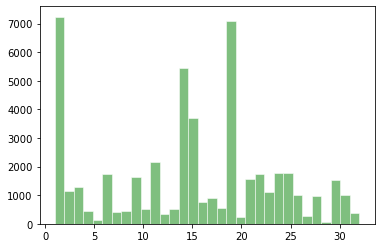

In [32]:
# para ello hacemos el histograma del comportamiento de la variable comportamiento interno 3
plt.hist(base_inicial_int_ext['comp_interno3'],32,edgecolor="white",color="green",alpha=.5)
print('Distribucion del comportamiento de la variable comportamiento_interno_3')
print('Se cuenta con un maximo de :',max(base_inicial_int_ext['comp_interno3']),' productos.')
print('Los productos mas solicitados son aquellos con clave: 1,14,15 y 19')
print('Mientras que los menos populares son aquellos con clave: 5,20 y 29')

In [33]:
Frecuencias_comp_interno3=(base_inicial_int_ext
  .groupby("comp_interno3")
  .agg(frequency=("comp_interno3", "count")))
Frecuencias_comp_interno3

,frequency
comp_interno3,
1.0,7240
2.0,1164
3.0,1270
4.0,434
5.0,134
6.0,1754
7.0,423
8.0,444
9.0,1649


Ahora, realicemos el analisis de la base de comportamiento. Estas bases son de las que más informacion tenemos por lo que nos apoyaremos en las mismas para establecer un criterio de selección

In [34]:
# Ahora bien, juntemos ambas bases de comportamiento
# para ello renombraremos num_caso en la base 3 como num_caso_b3
base_comportamiento_3.rename(columns={'num_caso':'num_caso_b3'},
               inplace=True)
base_comportamiento = pd.concat([base_comportamiento_2,base_comportamiento_3['num_caso_b3'],base_comportamiento_3['comportamiento_j']], axis=1)
base_comportamiento[0:60]

,num_caso,mes_informacion,Tiempo_aparicion,num_caso_b3,comportamiento_j
0,1.0,"2016-04-01,00:00:00",0.0,1,0.0
1,1.0,"2016-05-01,00:00:00",1.0,1,0.0
2,1.0,"2016-06-01,00:00:00",2.0,1,0.0
3,1.0,"2016-07-01,00:00:00",3.0,1,0.0
4,1.0,"2016-08-01,00:00:00",4.0,1,0.0
5,1.0,"2016-09-01,00:00:00",5.0,1,0.0
6,1.0,"2016-10-01,00:00:00",6.0,1,0.0
7,1.0,"2016-11-01,00:00:00",7.0,1,0.0
8,1.0,"2016-12-01,00:00:00",8.0,1,0.0
9,1.0,"2017-01-01,00:00:00",9.0,1,1.0


In [35]:
# Ahora, seria conveniente realizar un analisis sobre  el promedio de comportamiento_j pues nos gustaria saber cuanto es el 
# promedio de adeudos que suelen tener los clientes y el tiempo promedio de duracion de los prestamos
prestamo = base_comportamiento.groupby('num_caso')['Tiempo_aparicion'].count()
# como comportamiento_j muestra valores acumulados no podemos sumar los valores en las columnas para contar el numero
# de adeudos, pues por ejemplo, si un cliente debiera el mes 1 y el mes 2, en la base aparecerian 1 y 2 respectivamente,
# que hace referencia en el primer caso a que debe 1 mensualidad mientras que en el segundo indica que como aun no ha pagado
# debe 2, la primera y la segunda, si sumaramos esta columna, el cliente apareceria con un total de 3 adeudos pues no 
# estariamos considerando que ese 2 indica que debe el actual y el anterior, por lo mismo haremos lo siguiente:

#tomaremos solo aquellos registros tales que el comportamiento_j (los adeudos) son mayores a 0 y contamos sobre esos
# registros agrupados, esto nos indicara correctamente el numero de adeudos totales del cliente j durante la vida de 
# su credito.
adeudos = base_comportamiento[base_comportamiento.comportamiento_j>0].groupby('num_caso')['comportamiento_j'].count()

print('El tiempo promedio de vida de los prestamos es: ',np.mean(prestamo))
print('El numero promedio de adeudo de los clientes es: ',np.mean(adeudos))
print('El numero maximo de adeudos de los clientes es: ',max(adeudos))
# si usaramos la funcion min, nos arrojaria 1 pues solo estamos tomando la parte de la base que es positiva en el 
# comportamiento_j pero durante el analisis hemos podido observar que hay clientes que nunca tuvieron adeudos.
print('El numero minimo de adeudo de los clientes es: ',0)

El tiempo promedio de vida de los prestamos es:  29.508535398588922
El numero promedio de adeudo de los clientes es:  4.263075088182303
El numero maximo de adeudos de los clientes es:  51
El numero minimo de adeudo de los clientes es:  0


Ahora, procedemos con el cruce de nuestras bases prestamo y adeudos 

In [36]:
# Renombraremos la base comportamiento, pues ya se ha podido trabajar sobre la informacion desagregada, manteniendo unicamente
# aquella que nos es de interés.
base_comportamiento = pd.concat([prestamo,adeudos], axis=1)
# como tenemos casos donde nunca hubo adeudos, rellenamos los NaN con 0's
base_comportamiento=base_comportamiento.fillna(0)
base_comportamiento

,Tiempo_aparicion,comportamiento_j
num_caso,,
1.0,62,7.0
7.0,29,9.0
8.0,63,4.0
9.0,15,0.0
10.0,16,1.0
...,...,...
98909.0,2,0.0
98910.0,2,0.0
98912.0,2,0.0


Frecuencia de Adeudos
Media en color negro:  4.263075088182303
Cuantil al 2.5% (linea azul izq):  0.0
Cuantil al 97.5% (linea azul der):  16.0


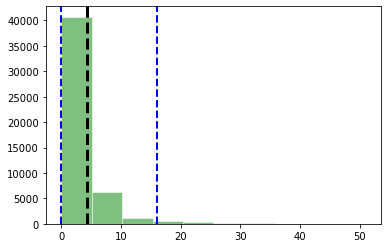

In [37]:
plt.hist(base_comportamiento['comportamiento_j'],edgecolor="white",color="green",alpha=.5)
plt.axvline(np.percentile(base_comportamiento['comportamiento_j'],2.5),color="blue",linestyle="--",linewidth=2)
plt.axvline(np.percentile(base_comportamiento['comportamiento_j'],97.5),color="blue",linestyle="--",linewidth=2)
plt.axvline(x=4.263075088182303,color='black', linestyle='--',linewidth=3,label="Promedio de adeudo de los clientes")
print("Frecuencia de Adeudos")
print("Media en color negro: ",4.263075088182303)
print("Cuantil al 2.5% (linea azul izq): ",np.percentile(base_comportamiento['comportamiento_j'],2.5))
print("Cuantil al 97.5% (linea azul der): ",np.percentile(base_comportamiento['comportamiento_j'],97.5))

In [38]:
base_comportamiento['% relacion'] = round((base_comportamiento['comportamiento_j']/base_comportamiento['Tiempo_aparicion'])*100,2)  
base_comportamiento

,Tiempo_aparicion,comportamiento_j,% relacion
num_caso,,,
1.0,62,7.0,11.29
7.0,29,9.0,31.03
8.0,63,4.0,6.35
9.0,15,0.0,0.00
10.0,16,1.0,6.25
...,...,...,...
98909.0,2,0.0,0.00
98910.0,2,0.0,0.00
98912.0,2,0.0,0.00


Grafiquemos el comportamiento del % de relacion de adeudos respecto a la vida de los prestamos, pues la propuesta será no autorizar creditos a las personas que rebasen la media.

Frecuencia de Adeudos
Media en color negro:  10.51896115481357
Cuantil al 2.5% (linea azul izq):  0.0
Cuantil al 97.5% (linea azul der):  48.39


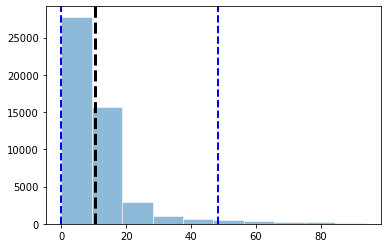

In [39]:
plt.hist(base_comportamiento['% relacion'],edgecolor="white",alpha=.5)
plt.axvline(np.percentile(base_comportamiento['% relacion'],2.5),color="blue",linestyle="--",linewidth=2)
plt.axvline(np.percentile(base_comportamiento['% relacion'],97.5),color="blue",linestyle="--",linewidth=2)
plt.axvline(np.mean(base_comportamiento['% relacion']),color='black', linestyle='--',linewidth=3,label="Promedio de adeudo de los clientes")
print("Frecuencia de Adeudos")
print("Media en color negro: ",np.mean(base_comportamiento['% relacion']))
print("Cuantil al 2.5% (linea azul izq): ",np.percentile(base_comportamiento['% relacion'],2.5))
print("Cuantil al 97.5% (linea azul der): ",np.percentile(base_comportamiento['% relacion'],97.5))

Si consideramos estas bases como el historial crediticio de nuestros clientes, podemos considerar que un buen cliente sería aquel tal que el numero de adeudos durante el tiempo de vida de sus creditos anteriores no rebase el promedio de adeudos de 10.52%

In [40]:
base_comportamiento['credito'] = base_comportamiento['% relacion'] < 10.52 
base_comportamiento

,Tiempo_aparicion,comportamiento_j,% relacion,credito
num_caso,,,,
1.0,62,7.0,11.29,False
7.0,29,9.0,31.03,False
8.0,63,4.0,6.35,True
9.0,15,0.0,0.00,True
10.0,16,1.0,6.25,True
...,...,...,...,...
98909.0,2,0.0,0.00,True
98910.0,2,0.0,0.00,True
98912.0,2,0.0,0.00,True


Finalmente, analicemos las bases de inversion:

In [41]:
# Por un lado, notemos que la base inversion contiene unicamente la informacion de la inversion del cliente asociado a 
# la llave _id2_, por lo que podemos utilizar la base_ini_parte1 para el cruce de informacion.
base_inversion

,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135
2,1051836,90.539953
3,1223255,90.205018
4,1894602,1.071354
...,...,...
17531,907442,2.660128
17532,231978,65.614854
17533,794742,25.169510
17534,209898,730.952882


In [42]:
base_ini_parte1

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318
...,...,...,...
49995,78795,1812285,0.34318
49996,9126,209898,0.38000
49997,44847,1031481,0.34000
49998,87200,2005600,0.26984


El componente mixto 1 sabemos que hace referencia al comportamiento del cliente dentro y fuera de la informacion de la
empresa, sinembargo no tenemos conocimiento sobre su calculo o la informacion exacta a la que refiere, motivo por el cual no
podemos realizar inferencia sobre este dato.

In [43]:
# Hacemos el cruce de las bases iniciales
# primero hacemos el cruce de la base_inicial_int_ext con la base incial parte 1 para asocial a cada _id_ su _id2_
bases_ini_inv = pd.merge(base_inicial_int_ext,base_ini_parte1, on="_id_")
# ahora que la base_inicial_int_ext tiene asociada la llave _id2_ podemos unir la base inversion a la misma 
bases_inv = pd.merge(base_ini_parte1,base_inversion, on="_id2_")

In [44]:
bases_ini_inv=pd.merge(base_inicial_int_ext,bases_inv, on="_id_")
bases_ini_inv=pd.merge(bases_ini_inv,base_comportamiento, left_on="_id_",right_on="num_caso")
# convertimos los true y false de credito en 1 y 0 
bases_ini_inv["credito"] = bases_ini_inv["credito"].astype(int)
bases_ini_inv=bases_ini_inv.drop(['_id2_'], axis=1)
bases_ini_inv=bases_ini_inv.drop(['% relacion'], axis=1)
bases_ini_inv=bases_ini_inv.drop(['comportamiento_j'], axis=1)
bases_ini_inv=bases_ini_inv.drop(['fecha_inicio'], axis=1)
bases_ini_inv=bases_ini_inv.drop(['comp_interno2'], axis=1)
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
0,76457,0.000000,28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0,0.33334,0.041039,16,1
1,68389,2026.342452,1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0,0.27318,77.422135,21,1
2,45732,3546.099291,15.0,70.0,1.0,9.0,160.0,640.579710,63.487504,81.0,-230.0,0.32988,90.539953,34,1
3,53185,759.878419,23.0,58.0,1.0,9.0,168.0,200.000000,19.821890,109.0,-230.0,0.37000,90.205018,33,0
4,82374,0.000000,22.0,61.0,1.0,9.0,167.0,214.202899,21.229532,37.0,-230.0,0.31664,1.071354,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17243,39454,1215.805471,2.0,48.0,2.0,11.0,147.0,6.666667,0.000000,128.0,-230.0,0.36136,2.660128,40,1
17244,10086,0.000000,19.0,63.0,1.0,8.0,164.0,185.518841,18.386670,57.0,-230.0,0.37614,65.614854,35,0
17245,34554,0.000000,11.0,48.0,2.0,9.0,156.0,159.420290,15.800057,102.0,-230.0,0.29524,25.169510,44,1
17246,9126,1215.805471,30.0,70.0,3.0,4.0,175.0,188.405797,9.652399,114.0,-230.0,0.38000,730.952882,46,1


Ahora bien, ya que contamos con la base completa y tratada procedemos al ajuste del modelo de regresión logistica para la base generada

# TAREA 2: SEMINARIO ESTADISTICA I

## REGRESION LOGISTICA
### EJERCICIO 1. Hacer un modelo regresión logistica con woes con la tabla que generaron en la tarea 1


In [45]:
from seaborn import load_dataset
x=bases_ini_inv.iloc[:,0:15]
y=bases_ini_inv["credito"]

In [46]:
x

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
0,76457,0.000000,28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0,0.33334,0.041039,16,1
1,68389,2026.342452,1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0,0.27318,77.422135,21,1
2,45732,3546.099291,15.0,70.0,1.0,9.0,160.0,640.579710,63.487504,81.0,-230.0,0.32988,90.539953,34,1
3,53185,759.878419,23.0,58.0,1.0,9.0,168.0,200.000000,19.821890,109.0,-230.0,0.37000,90.205018,33,0
4,82374,0.000000,22.0,61.0,1.0,9.0,167.0,214.202899,21.229532,37.0,-230.0,0.31664,1.071354,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17243,39454,1215.805471,2.0,48.0,2.0,11.0,147.0,6.666667,0.000000,128.0,-230.0,0.36136,2.660128,40,1
17244,10086,0.000000,19.0,63.0,1.0,8.0,164.0,185.518841,18.386670,57.0,-230.0,0.37614,65.614854,35,0
17245,34554,0.000000,11.0,48.0,2.0,9.0,156.0,159.420290,15.800057,102.0,-230.0,0.29524,25.169510,44,1
17246,9126,1215.805471,30.0,70.0,3.0,4.0,175.0,188.405797,9.652399,114.0,-230.0,0.38000,730.952882,46,1


In [47]:
# Primero hagamos la regresion sin el calculo de los WoEs
# separamos datos de test y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [48]:
# escalamos los datos
from sklearn.preprocessing import StandardScaler
escalar= StandardScaler()
x_train=escalar.fit_transform(x_train)
x_test=escalar.fit_transform(x_test)

In [49]:
# definimos el algoritmo a utilizar
algoritmo=LogisticRegression()
#entrenamos el modelo
algoritmo.fit(x_train,y_train)

LogisticRegression()

In [50]:
# Hacemos prediccion con el modelo
y_pred=algoritmo.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [51]:
# Calculemos la matriz de confusion
matr=confusion_matrix(y_test,y_pred)
print('Matriz de confusion')
print(matr)

Matriz de confusion
[[1306    0]
 [   0 2144]]


##### Notemos que para el 20% de los datos el modelo pareciera ajustar perfectamente, sin embargo, estamos trabajando con un modelo saturado por lo que procedemos con el calculo de los WoE's e IV's para buscar un modelo mas sencillo.


In [52]:
# Creamos una funcion para el calculo de los WoE's, esto debido a que no me fue posible 
# cargar la paqueteria vista en clase.
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Dataframe vacio
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Ectraemos nombre de columnas
    cols = data.columns
    
    #usamos ciclo for para correr sobre todas las variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [53]:
iv, woe = iv_woe(data = bases_ini_inv, target = 'credito')

Information value of _id_ is 0.10759
Information value of comp_interno1 is 0.002126
Information value of comp_interno3 is 0.003447
Information value of comp_interno4 is 0.001684
Information value of categoria1 is 0.011715
Information value of categoria2 is 0.002192
Information value of categoria3 is 0.003447
Information value of comp_externo1 is 0.011029
Information value of comp_externo2 is 0.014338
Information value of comp_externo3 is 0.05425
Information value of comp_externo4 is 0.006814
Information value of comp_mixto1 is 0.015865
Information value of inversion is 0.010296
Information value of Tiempo_aparicion is 0.129259


In [54]:
# observemos que las variables que proporcionan informacion para el modelo son comp_externo3 y tiempo_aparicion
# es claro, bajo el criterio del IV
# NOTA: No se considera el _id_ pues como tal no representa una variable en funcion de la informacion 
# entonces, procedemos al calculo de los woes para la variable comp_externo3
woe[woe.Variable=='comp_externo3']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,comp_externo3,"(-609.001, 39.0]",1755,985,0.090127,770,0.121855,-0.301608,0.009569
1,comp_externo3,"(39.0, 64.0]",1796,988,0.090402,808,0.127868,-0.346738,0.012991
2,comp_externo3,"(64.0, 77.0]",1702,1005,0.091957,697,0.110302,-0.181901,0.003337
3,comp_externo3,"(77.0, 88.0]",1692,1057,0.096715,635,0.100491,-0.038294,0.000145
4,comp_externo3,"(88.0, 98.0]",1697,1049,0.095983,648,0.102548,-0.066157,0.000434
5,comp_externo3,"(98.0, 108.0]",1782,1168,0.106872,614,0.097167,0.095194,0.000924
6,comp_externo3,"(108.0, 116.0]",1812,1217,0.111355,595,0.094160,0.167724,0.002884
7,comp_externo3,"(116.0, 122.0]",1623,1060,0.096990,563,0.089096,0.084886,0.000670
8,comp_externo3,"(122.0, 128.0]",1780,1296,0.118584,484,0.076594,0.437094,0.018353
9,comp_externo3,"(128.0, 159.0]",1609,1104,0.101016,505,0.079918,0.234278,0.004943


In [55]:
# creamos un vector con las transformaciones de los WoE's para la columna comp_externo3
v0=concatenate((repeat(-0.301608,1755),repeat(-0.346738,1796),repeat(-0.181901,1702),repeat(-0.038294,1692),repeat(-0.066157,1697),repeat(0.095194,1782),repeat(0.167724,1812),repeat(0.084886,1623),repeat(0.437094,1780),repeat(0.234278,1609)),axis=0)
v0


array([-0.301608, -0.301608, -0.301608, ...,  0.234278,  0.234278,
        0.234278])

In [56]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('comp_externo3')
bases_ini_inv.comp_externo3=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
14683,14257,0.000000,22.0,56.0,1.0,9.0,167.0,0.000000,0.000000,-0.301608,1.000000e+10,0.32838,10.110338,54,0
7308,32527,0.000000,1.0,75.0,2.0,9.0,146.0,0.000000,0.000000,-0.301608,1.000000e+10,0.25882,4.096161,38,0
2101,13881,0.000000,1.0,43.0,1.0,7.0,146.0,0.000000,0.000000,-0.301608,1.000000e+10,0.30590,17.430933,56,1
704,23975,1215.805471,1.0,73.0,1.0,11.0,146.0,0.000000,0.000000,-0.301608,1.000000e+10,0.35334,120.839755,47,0
5089,15752,0.000000,25.0,74.0,2.0,9.0,170.0,0.000000,0.000000,-0.301608,1.000000e+10,0.34000,60.480257,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7873,98728,0.000000,19.0,68.0,3.0,9.0,164.0,66.956522,0.000000,0.234278,-2.300000e+02,0.26846,9.770502,2,1
1598,40540,911.854103,19.0,55.0,2.0,9.0,164.0,347.826087,34.472853,0.234278,-2.300000e+02,0.37000,26.545706,39,1
14059,18095,1215.805471,14.0,66.0,2.0,9.0,159.0,86.956522,0.000000,0.234278,-2.300000e+02,0.33884,23.489545,54,0
3746,79512,0.000000,28.0,71.0,3.0,9.0,173.0,289.855072,0.000000,0.234278,-2.300000e+02,0.30000,3.344294,13,0


In [57]:
# entonces, procedemos al calculo de los woes para la variable comp_externo3
woe[woe.Variable=='comp_externo2']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,comp_externo2,"(-0.001, 6.176]",3464,2129,0.194803,1335,0.211268,-0.081138,0.001336
1,comp_externo2,"(6.176, 10.89]",1711,1025,0.093787,686,0.108561,-0.146289,0.002161
2,comp_externo2,"(10.89, 14.938]",1777,1046,0.095709,731,0.115683,-0.189544,0.003786
3,comp_externo2,"(14.938, 21.115]",1680,1078,0.098637,602,0.095268,0.034746,0.000117
4,comp_externo2,"(21.115, 28.727]",1862,1176,0.107604,686,0.108561,-0.008862,0.000008
5,comp_externo2,"(28.727, 38.891]",1579,1028,0.094062,551,0.087197,0.075777,0.000520
6,comp_externo2,"(38.891, 56.306]",1735,1173,0.107329,562,0.088938,0.187959,0.003457
7,comp_externo2,"(56.306, 84.053]",1715,1124,0.102846,591,0.093527,0.094974,0.000885
8,comp_externo2,"(84.053, 861.821]",1725,1150,0.105225,575,0.090995,0.145288,0.002067


In [58]:
# creamos un vector con las transformaciones de los WoE's para la columna comp_externo3
v0=concatenate((repeat(-0.081138,3464),repeat(-0.146289,1711),repeat(-0.189544,1777),repeat(0.034746,1680),repeat(-0.008862,1862),repeat(0.075777,1579),repeat(0.187959,1735),repeat(0.094974,1715),repeat(0.145288,1725)),axis=0)
v0

array([-0.081138, -0.081138, -0.081138, ...,  0.145288,  0.145288,
        0.145288])

In [59]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('comp_externo2')
bases_ini_inv.comp_externo2=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
14683,14257,0.000000,22.0,56.0,1.0,9.0,167.0,0.000000,-0.081138,-0.301608,1.000000e+10,0.32838,10.110338,54,0
7611,23303,3039.513678,12.0,72.0,3.0,9.0,157.0,121.449275,-0.081138,0.095194,-2.300000e+02,0.34000,52.303816,50,1
3621,63662,0.000000,1.0,45.0,1.0,11.0,146.0,17.391304,-0.081138,0.095194,-2.300000e+02,0.38000,1.046861,24,1
4830,7640,0.000000,1.0,73.0,2.0,9.0,146.0,0.011594,-0.081138,0.095194,-2.300000e+02,0.36758,3.934971,62,0
7696,23468,0.000000,2.0,51.0,1.0,9.0,147.0,144.927536,-0.081138,0.095194,-2.300000e+02,0.29370,1.510817,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,76162,121580.547112,31.0,66.0,2.0,4.0,176.0,4931.014493,0.145288,0.095194,-2.300000e+02,0.31922,3.934912,16,0
8266,76291,52684.903749,1.0,71.0,2.0,9.0,146.0,6376.811594,0.145288,0.095194,-2.300000e+02,0.28000,8.404166,16,0
11844,90748,5065.856130,14.0,73.0,1.0,9.0,159.0,8695.652174,0.145288,-0.038294,-2.300000e+02,0.38000,637.849183,6,1
4393,78716,2026.342452,6.0,71.0,1.0,6.0,151.0,8695.652174,0.145288,0.095194,-2.300000e+02,0.34632,23.779790,14,0


In [60]:
# ahora, procedemos al calculo de los woes para la variable tiempo_aparicion
woe[woe.Variable=='Tiempo_aparicion']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Tiempo_aparicion,"(0.999, 6.0]",1740,1472,0.134688,268,0.042412,1.155531,0.106628
1,Tiempo_aparicion,"(6.0, 12.0]",1726,1155,0.105682,571,0.090362,0.156608,0.002399
2,Tiempo_aparicion,"(12.0, 18.0]",1741,1021,0.093421,720,0.113942,-0.198572,0.004075
3,Tiempo_aparicion,"(18.0, 24.0]",1774,1136,0.103944,638,0.100965,0.029071,0.000087
4,Tiempo_aparicion,"(24.0, 31.0]",1872,1152,0.105408,720,0.113942,-0.077855,0.000664
5,Tiempo_aparicion,"(31.0, 37.0]",1755,1017,0.093055,738,0.116791,-0.227190,0.005392
6,Tiempo_aparicion,"(37.0, 43.0]",1562,942,0.086193,620,0.098117,-0.129573,0.001545
7,Tiempo_aparicion,"(43.0, 50.0]",1659,997,0.091225,662,0.104763,-0.138374,0.001873
8,Tiempo_aparicion,"(50.0, 57.0]",1852,1069,0.097813,783,0.123912,-0.236513,0.006173
9,Tiempo_aparicion,"(57.0, 65.0]",1567,968,0.088572,599,0.094793,-0.067888,0.000422


In [61]:
v0=concatenate((repeat(1.155531,1740),repeat(0.156608,1726),repeat(-0.198572,1741),repeat(0.029071,1774),repeat(-0.077855,1872),repeat(-0.227190,1755),repeat(-0.129573,1562),repeat(-0.138374,1659),repeat(-0.236513,1852),repeat(-0.067888,1567)),axis=0)
v0


array([ 1.155531,  1.155531,  1.155531, ..., -0.067888, -0.067888,
       -0.067888])

In [62]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('Tiempo_aparicion')
bases_ini_inv.Tiempo_aparicion=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
16423,35494,0.000000,32.0,75.0,3.0,8.0,177.0,163.478261,0.034746,0.437094,-2.300000e+02,0.37988,215.647608,1.155531,1
11053,55167,4305.977710,1.0,68.0,1.0,9.0,146.0,513.043478,0.187959,-0.038294,-2.300000e+02,0.24768,438.283687,1.155531,1
15710,98915,1519.756839,6.0,44.0,3.0,9.0,151.0,81.159420,-0.081138,-0.346738,-2.290000e+02,0.24500,1.794679,1.155531,1
5726,31431,0.000000,28.0,35.0,1.0,3.0,173.0,0.000000,-0.081138,-0.301608,1.000000e+10,0.34030,2455.116394,1.155531,1
16224,49498,7092.198582,2.0,52.0,2.0,9.0,147.0,304.347826,0.075777,-0.346738,-2.300000e+02,0.34000,0.001272,1.155531,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099,751,856.129686,11.0,49.0,1.0,9.0,156.0,72.463768,-0.081138,-0.301608,-2.290000e+02,0.32858,0.002544,-0.067888,0
4653,113,0.000000,19.0,51.0,3.0,9.0,164.0,124.637681,-0.189544,0.095194,-2.300000e+02,0.30694,0.001832,-0.067888,0
6994,3067,0.000000,19.0,51.0,1.0,9.0,164.0,144.927536,-0.081138,-0.346738,-2.300000e+02,0.37602,146.116348,-0.067888,1
10256,1372,0.000000,28.0,45.0,1.0,5.0,173.0,173.913043,0.034746,0.084886,-2.300000e+02,0.37000,425.869930,-0.067888,1


In [63]:
# ahora, procedemos al calculo de los woes para la variable _id_
woe[woe.Variable=='_id_']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,_id_,"(0.999, 8123.4]",1725,992,0.090768,733,0.115999,-0.245281,0.006189
1,_id_,"(8123.4, 16324.4]",1725,1019,0.093238,706,0.111727,-0.180897,0.003344
2,_id_,"(16324.4, 25134.2]",1725,1034,0.094611,691,0.109353,-0.144809,0.002135
3,_id_,"(25134.2, 34572.2]",1724,1030,0.094245,694,0.109828,-0.153017,0.002384
4,_id_,"(34572.2, 43932.5]",1725,1058,0.096807,667,0.105555,-0.086513,0.000757
5,_id_,"(43932.5, 53493.4]",1725,1038,0.094977,687,0.108720,-0.135142,0.001857
6,_id_,"(53493.4, 63918.2]",1724,1096,0.100284,628,0.099383,0.009023,0.000008
7,_id_,"(63918.2, 75190.8]",1725,1072,0.098088,653,0.103339,-0.052155,0.000274
8,_id_,"(75190.8, 87861.6]",1725,1158,0.105957,567,0.089729,0.166232,0.002697
9,_id_,"(87861.6, 98915.0]",1725,1432,0.131028,293,0.046368,1.038796,0.087944


In [64]:
v0=concatenate((repeat(-0.245281,1725),repeat(-0.180897,1725),repeat(-0.144809,1725),repeat(-0.153017,1724),repeat(-0.086513,1725),repeat(-0.135142,1725),repeat( 0.009023,1724),repeat(-0.052155,1725),repeat(0.166232,1725),repeat(1.038796,1725)),axis=0)
v0

array([-0.245281, -0.245281, -0.245281, ...,  1.038796,  1.038796,
        1.038796])

In [65]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('_id_')
bases_ini_inv._id_=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
9237,-0.245281,3039.513678,26.0,67.0,3.0,3.0,171.0,217.391304,-0.008862,0.095194,-230.0,0.38000,52.500490,-0.067888,0
7098,-0.245281,1547.112462,28.0,75.0,1.0,11.0,173.0,468.115942,-0.008862,0.095194,-230.0,0.33360,0.047480,-0.077855,0
3251,-0.245281,1215.805471,14.0,55.0,2.0,6.0,159.0,371.884058,0.075777,0.437094,-230.0,0.27898,227.537211,-0.067888,1
5406,-0.245281,0.000000,11.0,55.0,2.0,9.0,156.0,85.507246,-0.146289,0.095194,-230.0,0.38000,0.921995,-0.198572,1
3667,-0.245281,0.000000,11.0,56.0,2.0,6.0,156.0,72.463768,-0.146289,-0.066157,-230.0,0.37050,39.259568,-0.198572,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14393,1.038796,0.000000,1.0,42.0,1.0,9.0,146.0,476.811594,0.187959,0.095194,-230.0,0.38000,19.552905,1.155531,1
2773,1.038796,7092.198582,22.0,63.0,2.0,9.0,167.0,1884.057971,0.145288,0.437094,-230.0,0.24208,6.838273,1.155531,1
9037,1.038796,0.000000,1.0,59.0,1.0,9.0,146.0,1501.449275,0.145288,0.234278,-230.0,0.36228,0.091599,1.155531,1
4329,1.038796,0.001013,17.0,52.0,6.0,9.0,162.0,281.159420,-0.008862,0.437094,-230.0,0.37000,1.442894,1.155531,1


In [66]:
# ahora, procedemos al calculo de los woes para la variable comp_mixto1
woe[woe.Variable=='comp_mixto1']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,comp_mixto1,"(0.199, 0.277]",1725,1169,0.106963,556,0.087989,0.195277,0.003705
1,comp_mixto1,"(0.277, 0.301]",1725,1143,0.104584,582,0.092103,0.127082,0.001586
2,comp_mixto1,"(0.301, 0.321]",1725,1139,0.104218,586,0.092736,0.116727,0.001340
3,comp_mixto1,"(0.321, 0.336]",1724,1139,0.104218,585,0.092578,0.118435,0.001379
4,comp_mixto1,"(0.336, 0.343]",1727,1072,0.098088,655,0.103656,-0.055213,0.000307
5,comp_mixto1,"(0.343, 0.358]",1725,1108,0.101382,617,0.097642,0.037584,0.000141
6,comp_mixto1,"(0.358, 0.367]",1777,1089,0.099643,688,0.108878,-0.088633,0.000819
7,comp_mixto1,"(0.367, 0.37]",2173,1286,0.117669,887,0.140370,-0.176412,0.004005
8,comp_mixto1,"(0.37, 0.38]",2773,1675,0.153262,1098,0.173762,-0.125536,0.002573
9,comp_mixto1,"(0.38, 0.411]",174,109,0.009973,65,0.010286,-0.030898,0.000010


In [67]:
v0=concatenate((repeat(0.195277,1725),repeat(0.127082,1725),repeat(0.116727,1725),repeat(0.118435,1724),repeat(-0.055213,1727),repeat(0.037584,1725),repeat( -0.088633,1777),repeat(-0.176412,2173),repeat(-0.125536,2773),repeat(-0.030898,174)),axis=0)
v0

array([ 0.195277,  0.195277,  0.195277, ..., -0.030898, -0.030898,
       -0.030898])

In [68]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('comp_mixto1')
bases_ini_inv.comp_mixto1=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
4721,-0.135142,0.000000,18.0,54.0,1.0,9.0,163.0,53.623188,-0.081138,0.234278,-230.0,0.195277,58.680315,-0.077855,1
16720,-0.180897,10131.712259,19.0,75.0,3.0,9.0,164.0,1040.579710,0.145288,0.167724,-230.0,0.195277,38.746231,-0.236513,1
1068,0.166232,0.000000,19.0,49.0,3.0,3.0,164.0,318.840580,-0.189544,0.095194,-230.0,0.195277,4.802415,0.156608,0
549,-0.052155,0.000000,19.0,51.0,2.0,9.0,164.0,495.652174,0.187959,0.437094,-230.0,0.195277,291.646581,-0.198572,0
10300,-0.144809,1215.805471,6.0,74.0,3.0,9.0,151.0,510.144928,0.187959,0.234278,-230.0,0.195277,2769.862019,1.155531,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12044,-0.180897,0.000000,15.0,49.0,1.0,9.0,160.0,162.318841,0.034746,0.084886,-230.0,-0.030898,0.013127,-0.236513,1
53,1.038796,0.000000,22.0,59.0,1.0,9.0,167.0,205.797101,0.034746,0.437094,-230.0,-0.030898,398.211167,1.155531,0
9318,-0.180897,506.585613,1.0,60.0,1.0,9.0,146.0,398.550725,0.187959,0.084886,-230.0,-0.030898,22.886978,-0.236513,1
11433,-0.180897,0.000000,3.0,49.0,2.0,3.0,148.0,1159.420290,0.145288,0.167724,-230.0,-0.030898,48.891225,-0.236513,0


In [69]:
# ahora, procedemos al calculo de los woes para la variable comp_mixto1
woe[woe.Variable=='categoria1']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,categoria1,1.0,7025,4241,0.388050,2784,0.440576,-0.126948,0.006668
1,categoria1,2.0,5339,3474,0.317870,1865,0.295142,0.074187,0.001686
2,categoria1,3.0,4175,2754,0.251990,1421,0.224877,0.113835,0.003086
3,categoria1,4.0,413,271,0.024796,142,0.022472,0.098433,0.000229
4,categoria1,5.0,156,98,0.008967,58,0.009179,-0.023334,0.000005
5,categoria1,6.0,140,91,0.008326,49,0.007754,0.071180,0.000041


In [70]:
v0=concatenate((repeat(-0.126948,7025),repeat(0.074187,5339),repeat(0.113835,4175),repeat(0.098433,413),repeat(-0.023334,156),repeat(0.071180,140)),axis=0)
v0

array([-0.126948, -0.126948, -0.126948, ...,  0.07118 ,  0.07118 ,
        0.07118 ])

In [71]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('categoria1')
bases_ini_inv.categoria1=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
4721,-0.135142,0.000000,18.0,54.0,-0.126948,9.0,163.0,53.623188,-0.081138,0.234278,-230.0,0.195277,58.680315,-0.077855,1
264,-0.245281,0.000000,6.0,56.0,-0.126948,9.0,151.0,110.144928,-0.189544,-0.181901,-230.0,0.037584,9.002124,-0.236513,1
3153,-0.245281,303.951368,26.0,54.0,-0.126948,6.0,171.0,12.463768,-0.081138,0.234278,-230.0,0.037584,48.048553,-0.067888,0
6602,1.038796,0.000000,6.0,55.0,-0.126948,9.0,151.0,359.420290,0.075777,0.234278,-230.0,0.037584,6.236033,1.155531,0
9250,-0.086513,0.000000,30.0,42.0,-0.126948,8.0,175.0,121.449275,-0.189544,-0.181901,-230.0,0.037584,19.487316,-0.129573,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,-0.180897,1215.805471,28.0,60.0,0.071180,9.0,173.0,1125.507246,0.145288,-0.066157,-230.0,0.127082,0.522847,-0.236513,1
8608,-0.135142,0.000000,4.0,51.0,0.071180,6.0,149.0,91.304348,-0.146289,-0.181901,-230.0,-0.088633,2.611879,-0.227190,1
6378,-0.135142,0.000000,14.0,48.0,0.071180,6.0,159.0,107.246377,-0.146289,-0.066157,-230.0,-0.125536,239.009883,-0.227190,1
4329,1.038796,0.001013,17.0,52.0,0.071180,9.0,162.0,281.159420,-0.008862,0.437094,-230.0,-0.176412,1.442894,1.155531,1


In [72]:
# ahora, procedemos al calculo de los woes para la variable comp_mixto1
woe[woe.Variable=='inversion']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,inversion,"(-0.0009883000000000001, 1.132]",1725,1025,0.093787,700,0.110777,-0.166491,0.002829
1,inversion,"(1.132, 4.024]",1725,1032,0.094428,693,0.109669,-0.149635,0.002281
2,inversion,"(4.024, 8.597]",1725,1079,0.098728,646,0.102231,-0.034868,0.000122
3,inversion,"(8.597, 15.976]",1724,1065,0.097447,659,0.104289,-0.067852,0.000464
4,inversion,"(15.976, 28.284]",1725,1102,0.100833,623,0.098592,0.022477,0.000050
5,inversion,"(28.284, 50.901]",1725,1095,0.100192,630,0.099699,0.004931,0.000002
6,inversion,"(50.901, 95.438]",1724,1123,0.102754,601,0.095110,0.077305,0.000591
7,inversion,"(95.438, 188.449]",1725,1115,0.102022,610,0.096534,0.055292,0.000303
8,inversion,"(188.449, 428.855]",1725,1143,0.104584,582,0.092103,0.127082,0.001586
9,inversion,"(428.855, 95052.397]",1725,1150,0.105225,575,0.090995,0.145288,0.002067


In [73]:
v0=concatenate((repeat(-0.166491,1725),repeat(-0.149635,1725),repeat(-0.034868,1725),repeat(-0.067852,1724),repeat(0.022477,1725),repeat(0.004931,1725),repeat(0.077305,1724),repeat(0.055292,1725),repeat(0.127082,1725),repeat(0.145288,1725)),axis=0)
v0

array([-0.166491, -0.166491, -0.166491, ...,  0.145288,  0.145288,
        0.145288])

In [74]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('inversion')
bases_ini_inv.inversion=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
4208,1.038796,0.000000,19.0,63.0,0.074187,9.0,164.0,359.420290,0.075777,-0.301608,-230.0,0.195277,-0.166491,1.155531,1
7917,-0.144809,0.000000,15.0,67.0,-0.126948,8.0,160.0,217.391304,-0.008862,-0.038294,-230.0,-0.176412,-0.166491,-0.138374,0
15537,-0.153017,0.000000,32.0,51.0,0.074187,9.0,177.0,43.478261,-0.081138,-0.038294,-230.0,0.116727,-0.166491,-0.138374,0
1576,-0.153017,0.000000,13.0,51.0,-0.126948,6.0,158.0,311.884058,0.075777,0.084886,-230.0,-0.176412,-0.166491,-0.236513,0
14288,-0.135142,1215.805471,22.0,64.0,0.074187,9.0,167.0,521.739130,0.034746,0.234278,-229.0,0.037584,-0.166491,-0.077855,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.009023,1013.171226,12.0,73.0,0.074187,6.0,157.0,2028.985507,0.145288,0.437094,-230.0,0.037584,0.145288,-0.077855,1
10917,-0.144809,6079.027356,1.0,42.0,0.074187,9.0,146.0,914.202899,0.145288,-0.066157,-230.0,-0.055213,0.145288,-0.138374,0
14869,-0.153017,0.000000,19.0,52.0,0.074187,3.0,164.0,637.681159,0.094974,0.167724,-230.0,0.127082,0.145288,-0.138374,0
12678,-0.086513,5065.856130,19.0,53.0,0.074187,9.0,164.0,637.681159,0.094974,0.167724,-230.0,0.116727,0.145288,-0.129573,0


In [75]:
# ahora, procedemos al calculo de los woes para la variable comp_mixto1
woe[woe.Variable=='comp_externo1']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,comp_externo1,"(-0.001, 49.275]",1751,1065,0.097447,686,0.108561,-0.108006,0.001200
1,comp_externo1,"(49.275, 101.449]",1735,1035,0.094702,700,0.110777,-0.156782,0.002520
2,comp_externo1,"(101.449, 144.928]",1702,1009,0.092323,693,0.109669,-0.172174,0.002987
3,comp_externo1,"(144.928, 205.797]",1716,1094,0.100101,622,0.098433,0.016797,0.000028
4,comp_externo1,"(205.797, 279.13]",1720,1083,0.099094,637,0.100807,-0.017138,0.000029
5,comp_externo1,"(279.13, 365.217]",1739,1135,0.103852,604,0.095585,0.082955,0.000686
6,comp_externo1,"(365.217, 486.957]",1712,1123,0.102754,589,0.093211,0.097474,0.000930
7,comp_externo1,"(486.957, 666.667]",1729,1137,0.104035,592,0.093686,0.104783,0.001084
8,comp_externo1,"(666.667, 982.609]",1721,1111,0.101656,610,0.096534,0.051698,0.000265
9,comp_externo1,"(982.609, 417496.116]",1723,1137,0.104035,586,0.092736,0.114970,0.001299


In [76]:
v0=concatenate((repeat(-0.108006,1751),repeat(-0.156782,1735),repeat(-0.172174,1702),repeat(0.016797,1716),repeat(-0.017138,1720),repeat(0.082955,1739),repeat(0.097474,1712),repeat(0.104783,1729),repeat(0.051698,1721),repeat(0.114970,1723)),axis=0)
v0

array([-0.108006, -0.108006, -0.108006, ...,  0.11497 ,  0.11497 ,
        0.11497 ])

In [77]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('comp_externo1')
bases_ini_inv.comp_externo1=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
16876,-0.153017,1215.805471,28.0,57.0,-0.126948,11.0,173.0,-0.108006,-0.081138,-0.301608,1.000000e+10,0.037584,-0.149635,-0.138374,0
7694,-0.135142,248.226950,11.0,56.0,0.074187,9.0,156.0,-0.108006,-0.081138,-0.038294,-2.300000e+02,-0.088633,0.022477,-0.227190,0
15458,-0.144809,658.561297,6.0,56.0,0.074187,9.0,151.0,-0.108006,-0.081138,-0.301608,1.000000e+10,0.116727,-0.166491,-0.129573,0
2442,0.009023,1215.805471,19.0,49.0,0.113835,9.0,164.0,-0.108006,-0.081138,-0.301608,1.000000e+10,0.195277,-0.067852,-0.198572,0
5651,-0.144809,0.000000,14.0,52.0,0.074187,4.0,159.0,-0.108006,-0.081138,-0.301608,1.000000e+10,0.127082,-0.149635,-0.138374,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15078,-0.180897,0.000000,15.0,62.0,0.074187,3.0,160.0,0.114970,0.187959,0.167724,-2.300000e+02,0.118435,0.145288,-0.067888,0
891,-0.180897,8105.369807,1.0,56.0,0.074187,9.0,146.0,0.114970,0.094974,0.234278,-2.300000e+02,0.118435,-0.166491,-0.067888,1
12880,-0.153017,5065.856130,11.0,55.0,0.074187,3.0,156.0,0.114970,0.094974,0.437094,-2.300000e+02,0.118435,0.145288,0.156608,0
3563,-0.144809,1317.122594,9.0,71.0,0.113835,6.0,154.0,0.114970,0.145288,0.084886,-2.300000e+02,0.116727,-0.149635,0.156608,1


In [78]:
# ahora, procedemos al calculo de los woes para la variable comp_mixto1
woe[woe.Variable=='comp_externo4']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,comp_externo4,-230.0,15414,9856,0.901821,5558,0.879570,0.024983,0.000556
1,comp_externo4,-229.0,1322,767,0.070180,555,0.087830,-0.224340,0.003960
2,comp_externo4,-228.0,12,3,0.000274,9,0.001424,-1.646471,0.001893
3,comp_externo4,9999999769.99,500,303,0.027724,197,0.031176,-0.117330,0.000405


In [79]:
v0=concatenate((repeat(0.024983,15414),repeat(-0.224340,1322),repeat(-1.646471,12),repeat(-0.117330,500)),axis=0)
v0

array([ 0.024983,  0.024983,  0.024983, ..., -0.11733 , -0.11733 ,
       -0.11733 ])

In [80]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('comp_externo4')
bases_ini_inv.comp_externo4=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
4249,-0.180897,0.000000,22.0,53.0,-0.126948,6.0,167.0,-0.017138,-0.008862,0.095194,0.024983,0.127082,0.004931,-0.236513,1
6209,-0.153017,0.000000,24.0,46.0,-0.126948,9.0,169.0,0.097474,-0.146289,-0.301608,0.024983,0.118435,0.022477,-0.138374,0
10449,0.166232,0.000000,21.0,52.0,-0.126948,5.0,166.0,0.097474,-0.008862,0.167724,0.024983,-0.176412,-0.034868,0.156608,0
480,-0.135142,0.000000,28.0,69.0,-0.126948,9.0,173.0,0.097474,-0.146289,-0.346738,0.024983,0.116727,-0.034868,-0.077855,0
15497,-0.052155,1519.756839,2.0,49.0,0.074187,9.0,147.0,0.097474,0.034746,-0.066157,0.024983,-0.088633,-0.166491,0.029071,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,-0.153017,4052.684904,1.0,73.0,0.074187,9.0,146.0,-0.108006,-0.081138,-0.301608,-0.117330,0.116727,0.145288,-0.138374,1
12014,0.166232,0.000000,19.0,60.0,0.113835,9.0,164.0,-0.108006,-0.081138,-0.301608,-0.117330,-0.125536,0.022477,-0.198572,1
3407,1.038796,0.000000,19.0,66.0,0.113835,9.0,164.0,-0.108006,-0.081138,-0.301608,-0.117330,0.037584,0.022477,1.155531,1
5045,-0.086513,0.000000,1.0,75.0,0.113835,9.0,146.0,-0.108006,-0.081138,-0.301608,-0.117330,0.195277,0.022477,-0.129573,0


In [81]:
# ahora, procedemos al calculo de los woes para la variable 
woe[woe.Variable=='comp_interno1']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,comp_interno1,"(-0.001, 506.586]",10592,6663,0.609662,3929,0.621776,-0.019674,0.000238
1,comp_interno1,"(506.586, 1013.171]",2097,1307,0.119590,790,0.125020,-0.044402,0.000241
2,comp_interno1,"(1013.171, 1519.757]",1200,786,0.071919,414,0.065517,0.093232,0.000597
3,comp_interno1,"(1519.757, 3039.514]",1777,1132,0.103578,645,0.102073,0.014632,0.000022
4,comp_interno1,"(3039.514, 329483.283]",1582,1041,0.095251,541,0.085615,0.106659,0.001028


In [82]:
v0=concatenate((repeat(-0.019674,10592),repeat(-0.044402,2097),repeat(0.093232,1200),repeat(0.014632,1777),repeat(0.106659,1582)),axis=0)
v0

array([-0.019674, -0.019674, -0.019674, ...,  0.106659,  0.106659,
        0.106659])

In [83]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('comp_interno1')
bases_ini_inv.comp_interno1=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
4249,-0.180897,-0.019674,22.0,53.0,-0.126948,6.0,167.0,-0.017138,-0.008862,0.095194,0.024983,0.127082,0.004931,-0.236513,1
14070,-0.153017,-0.019674,25.0,51.0,0.074187,9.0,170.0,-0.017138,-0.008862,-0.038294,0.024983,-0.176412,-0.067852,-0.138374,1
5450,1.038796,-0.019674,19.0,44.0,0.074187,9.0,164.0,-0.017138,-0.008862,0.084886,0.024983,-0.176412,-0.067852,1.155531,1
888,1.038796,-0.019674,1.0,54.0,-0.126948,8.0,146.0,0.051698,-0.008862,-0.181901,0.024983,-0.088633,-0.067852,1.155531,1
6561,-0.153017,-0.019674,23.0,75.0,-0.126948,9.0,168.0,-0.017138,-0.008862,-0.346738,0.024983,-0.055213,0.127082,0.156608,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,-0.245281,0.106659,19.0,69.0,0.074187,3.0,164.0,0.114970,0.145288,-0.038294,0.024983,0.195277,0.055292,-0.067888,0
1813,0.166232,0.106659,15.0,64.0,-0.126948,9.0,160.0,0.114970,0.145288,-0.066157,0.024983,0.195277,0.077305,-0.198572,1
7455,1.038796,0.106659,4.0,71.0,0.074187,9.0,149.0,0.104783,0.094974,-0.066157,0.024983,-0.088633,0.127082,0.156608,1
14362,0.009023,0.106659,1.0,69.0,0.074187,9.0,146.0,0.051698,0.094974,0.234278,0.024983,0.118435,0.127082,0.029071,0


In [84]:
# ahora, procedemos al calculo de los woes para la variable 
woe[woe.Variable=='comp_interno3']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,comp_interno3,"(0.999, 6.0]",3761,2387,0.218410,1374,0.217439,0.004452,0.000004
1,comp_interno3,"(6.0, 11.0]",1783,1117,0.102205,666,0.105396,-0.030747,0.000098
2,comp_interno3,"(11.0, 14.0]",2014,1304,0.119316,710,0.112360,0.060068,0.000418
3,comp_interno3,"(14.0, 16.0]",1218,736,0.067344,482,0.076278,-0.124573,0.001113
4,comp_interno3,"(16.0, 19.0]",3620,2344,0.214475,1276,0.201931,0.060270,0.000756
5,comp_interno3,"(19.0, 23.0]",1453,891,0.081526,562,0.088938,-0.087016,0.000645
6,comp_interno3,"(23.0, 26.0]",1872,1202,0.109983,670,0.106029,0.036606,0.000145
7,comp_interno3,"(26.0, 32.0]",1527,948,0.086742,579,0.091628,-0.054807,0.000268


In [85]:
v0=concatenate((repeat(0.004452,3761),repeat(-0.030747,1783),repeat(0.060068,2014),repeat(-0.124573,1218),repeat(0.060270,3620),repeat(-0.087016,1453),repeat(0.036606,1872),repeat(-0.054807,1527)),axis=0)
v0

array([ 0.004452,  0.004452,  0.004452, ..., -0.054807, -0.054807,
       -0.054807])

In [86]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('comp_interno3')
bases_ini_inv.comp_interno3=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
2730,-0.135142,-0.019674,0.004452,71.0,-0.126948,9.0,146.0,-0.172174,-0.189544,0.167724,0.024983,-0.125536,0.004931,0.156608,0
16969,1.038796,-0.019674,0.004452,63.0,0.113835,9.0,146.0,-0.156782,-0.146289,-0.301608,-0.224340,0.195277,-0.034868,1.155531,1
2812,-0.135142,-0.019674,0.004452,48.0,0.113835,9.0,146.0,-0.017138,-0.189544,0.234278,0.024983,0.118435,-0.149635,-0.227190,1
2393,-0.135142,-0.019674,0.004452,60.0,-0.126948,9.0,146.0,0.114970,0.187959,-0.066157,0.024983,-0.088633,0.055292,-0.227190,0
12556,0.166232,-0.019674,0.004452,47.0,-0.126948,8.0,146.0,0.082955,-0.008862,0.095194,0.024983,0.118435,-0.166491,0.156608,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,-0.144809,0.014632,-0.054807,65.0,0.113835,9.0,177.0,0.104783,-0.008862,-0.346738,0.024983,0.195277,0.022477,0.029071,1
4250,-0.086513,-0.044402,-0.054807,32.0,0.113835,9.0,177.0,-0.108006,-0.081138,-0.346738,-0.224340,0.118435,0.004931,1.155531,1
10679,-0.135142,0.014632,-0.054807,75.0,0.113835,9.0,177.0,-0.108006,-0.081138,-0.301608,0.024983,0.195277,0.055292,1.155531,1
8888,0.009023,-0.019674,-0.054807,65.0,0.098433,9.0,177.0,-0.108006,-0.081138,-0.301608,-0.117330,0.037584,0.127082,-0.077855,1


In [87]:
# ahora, procedemos al calculo de los woes para la variable 
woe[woe.Variable=='comp_interno4']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,comp_interno4,"(23.999, 45.0]",2023,1253,0.114649,770,0.121855,-0.060953,4.392073e-04
1,comp_interno4,"(45.0, 48.0]",1627,1039,0.095068,588,0.093053,0.021428,4.318788e-05
2,comp_interno4,"(48.0, 51.0]",1744,1110,0.101565,634,0.100332,0.012208,1.504347e-05
3,comp_interno4,"(51.0, 54.0]",1816,1127,0.103120,689,0.109036,-0.055786,3.300332e-04
4,comp_interno4,"(54.0, 57.0]",1700,1077,0.098545,623,0.098592,-0.000471,2.183685e-08
5,comp_interno4,"(57.0, 60.0]",1502,947,0.086650,555,0.087830,-0.013528,1.596499e-05
6,comp_interno4,"(60.0, 64.0]",1842,1173,0.107329,669,0.105871,0.013677,1.994020e-05
7,comp_interno4,"(64.0, 68.0]",1587,1006,0.092049,581,0.091945,0.001128,1.170044e-07
8,comp_interno4,"(68.0, 73.0]",1967,1252,0.114558,715,0.113151,0.012356,1.738246e-05
9,comp_interno4,"(73.0, 79.0]",1440,945,0.086467,495,0.078335,0.098768,8.031858e-04


In [88]:
v0=concatenate((repeat(-0.060953,2023),repeat(0.021428,1627),repeat(0.012208,1744),repeat(-0.055786,1816),repeat(-0.000471,1700),repeat(-0.013528,1502),repeat(0.013677,1842),repeat(0.001128,1587),repeat(0.012356,1967),repeat(0.098768,1440)),axis=0)
v0

array([-0.060953, -0.060953, -0.060953, ...,  0.098768,  0.098768,
        0.098768])

In [89]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('comp_interno4')
bases_ini_inv.comp_interno4=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
11545,-0.245281,-0.019674,0.060068,-0.060953,-0.126948,6.0,159.0,0.097474,-0.189544,-0.181901,-0.224340,0.116727,0.145288,-0.198572,1
13421,-0.135142,0.106659,0.004452,-0.060953,-0.126948,9.0,146.0,-0.156782,-0.146289,0.167724,0.024983,0.116727,0.022477,0.029071,1
3139,0.009023,-0.019674,0.060068,-0.060953,-0.126948,9.0,159.0,-0.017138,-0.008862,0.437094,0.024983,0.195277,0.145288,-0.077855,1
14961,0.009023,-0.019674,-0.087016,-0.060953,-0.126948,8.0,167.0,-0.017138,-0.008862,0.167724,0.024983,0.116727,0.004931,-0.077855,1
1266,-0.180897,-0.019674,-0.087016,-0.060953,-0.126948,6.0,168.0,0.016797,0.034746,-0.181901,0.024983,0.116727,-0.149635,-0.198572,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,-0.245281,0.106659,0.060270,0.098768,0.113835,9.0,164.0,0.051698,0.094974,-0.066157,0.024983,0.127082,0.055292,-0.067888,1
16787,-0.086513,-0.019674,0.036606,0.098768,-0.126948,10.0,169.0,0.082955,-0.146289,-0.346738,0.024983,-0.125536,0.022477,-0.129573,1
9215,0.009023,-0.019674,0.060270,0.098768,0.113835,9.0,164.0,-0.108006,-0.081138,-0.301608,-0.117330,-0.125536,0.077305,-0.077855,1
16804,-0.245281,-0.044402,0.004452,0.098768,0.113835,9.0,150.0,0.082955,-0.081138,0.095194,0.024983,-0.176412,-0.034868,-0.067888,1


In [90]:
# ahora, procedemos al calculo de los woes para la variable 
woe[woe.Variable=='categoria2']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,categoria2,"(0.999, 5.0]",2304,1462,0.133773,842,0.133249,0.003922,0.000002
1,categoria2,"(5.0, 6.0]",2133,1296,0.118584,837,0.132458,-0.110645,0.001535
2,categoria2,"(6.0, 8.0]",971,601,0.054991,370,0.058554,-0.062767,0.000224
3,categoria2,"(8.0, 9.0]",10887,6964,0.637204,3923,0.620826,0.026039,0.000426
4,categoria2,"(9.0, 13.0]",953,606,0.055449,347,0.054914,0.009696,0.000005


In [91]:
v0=concatenate((repeat(0.003922,2304),repeat(-0.110645,2133),repeat(-0.062767,971),repeat(0.026039,10887),repeat(0.009696,953)),axis=0)
v0

array([0.003922, 0.003922, 0.003922, ..., 0.009696, 0.009696, 0.009696])

In [92]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('categoria2')
bases_ini_inv.categoria2=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
12785,-0.144809,0.106659,0.060270,0.001128,0.113835,0.003922,164.0,-0.156782,-0.146289,-0.066157,0.024983,-0.176412,0.145288,-0.138374,1
13273,1.038796,0.106659,0.060068,-0.000471,0.074187,0.003922,159.0,0.051698,0.145288,0.095194,0.024983,-0.055213,0.004931,0.156608,1
9757,-0.144809,0.106659,0.036606,0.013677,0.074187,0.003922,171.0,0.104783,0.094974,-0.066157,0.024983,0.195277,0.127082,1.155531,1
10483,-0.144809,0.093232,0.036606,-0.060953,0.074187,0.003922,170.0,-0.017138,-0.008862,-0.346738,0.024983,-0.088633,0.127082,-0.236513,1
7915,-0.180897,-0.019674,0.004452,0.021428,-0.126948,0.003922,147.0,-0.156782,-0.146289,0.167724,-0.224340,-0.176412,-0.149635,-0.236513,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,1.038796,0.014632,-0.054807,0.013677,0.074187,0.009696,176.0,0.051698,0.094974,0.437094,0.024983,-0.088633,0.145288,1.155531,1
748,0.009023,0.106659,0.004452,-0.000471,0.074187,0.009696,149.0,0.114970,0.145288,0.095194,0.024983,0.195277,0.004931,0.029071,1
9289,-0.245281,-0.019674,-0.124573,0.098768,-0.126948,0.009696,160.0,0.082955,-0.008862,-0.038294,0.024983,0.118435,0.055292,-0.077855,0
9970,-0.153017,0.014632,0.060068,0.013677,0.113835,0.009696,159.0,0.114970,0.145288,-0.038294,0.024983,-0.055213,-0.166491,-0.198572,1


In [93]:
# ahora, procedemos al calculo de los woes para la variable 
woe[woe.Variable=='categoria3']

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,categoria3,"(145.999, 151.0]",3761,2387,0.218410,1374,0.217439,0.004452,0.000004
1,categoria3,"(151.0, 156.0]",1783,1117,0.102205,666,0.105396,-0.030747,0.000098
2,categoria3,"(156.0, 159.0]",2014,1304,0.119316,710,0.112360,0.060068,0.000418
3,categoria3,"(159.0, 161.0]",1218,736,0.067344,482,0.076278,-0.124573,0.001113
4,categoria3,"(161.0, 164.0]",3620,2344,0.214475,1276,0.201931,0.060270,0.000756
5,categoria3,"(164.0, 168.0]",1453,891,0.081526,562,0.088938,-0.087016,0.000645
6,categoria3,"(168.0, 171.0]",1872,1202,0.109983,670,0.106029,0.036606,0.000145
7,categoria3,"(171.0, 177.0]",1527,948,0.086742,579,0.091628,-0.054807,0.000268


In [94]:
v0=concatenate((repeat(0.004452,3761),repeat(-0.030747,1783),repeat(0.060068,2014),repeat(-0.124573,1218),repeat(0.060270,3620),repeat(-0.087016,1453),repeat(0.036606,1872),repeat(-0.054807,1527)),axis=0)
v0

array([ 0.004452,  0.004452,  0.004452, ..., -0.054807, -0.054807,
       -0.054807])

In [95]:
# actualizamos los valores a la transformacion de woes
bases_ini_inv=bases_ini_inv.sort_values('categoria3')
bases_ini_inv.categoria3=v0
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
12967,-0.245281,0.106659,0.004452,0.001128,-0.126948,0.026039,0.004452,0.082955,0.075777,0.234278,0.024983,0.116727,0.145288,-0.077855,0
15026,-0.180897,-0.019674,0.004452,0.013677,0.074187,0.026039,0.004452,-0.172174,-0.189544,-0.301608,-0.224340,-0.176412,0.077305,-0.236513,1
8828,-0.144809,0.106659,0.004452,0.013677,0.074187,0.026039,0.004452,0.097474,0.075777,0.437094,0.024983,0.195277,0.145288,0.156608,0
3681,-0.245281,-0.019674,0.004452,0.012208,-0.126948,0.026039,0.004452,0.016797,-0.081138,-0.346738,0.024983,-0.125536,-0.034868,-0.067888,0
7829,0.166232,-0.019674,0.004452,0.013677,-0.126948,0.026039,0.004452,0.114970,0.145288,-0.038294,0.024983,0.195277,0.022477,0.156608,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8957,0.009023,-0.019674,-0.054807,-0.013528,0.074187,0.009696,-0.054807,0.016797,-0.146289,0.167724,0.024983,-0.088633,-0.034868,-0.077855,1
12031,-0.135142,-0.019674,-0.054807,-0.013528,-0.126948,0.026039,-0.054807,-0.108006,-0.081138,-0.301608,-0.224340,0.116727,-0.166491,-0.077855,1
16905,-0.153017,-0.019674,-0.054807,0.021428,0.071180,0.026039,-0.054807,-0.017138,-0.189544,0.437094,0.024983,-0.125536,0.055292,-0.129573,1
3730,-0.086513,-0.019674,-0.054807,-0.055786,0.074187,0.026039,-0.054807,-0.156782,-0.146289,-0.038294,0.024983,-0.125536,-0.149635,-0.129573,0


In [96]:
bases_ini_inv=bases_ini_inv.sort_values('_id_')
bases_ini_inv

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion,credito
12967,-0.245281,0.106659,0.004452,0.001128,-0.126948,0.026039,0.004452,0.082955,0.075777,0.234278,0.024983,0.116727,0.145288,-0.077855,0
12357,-0.245281,0.106659,0.060068,0.013677,0.113835,-0.062767,0.060068,0.082955,-0.008862,0.234278,0.024983,0.195277,0.077305,-0.227190,1
1745,-0.245281,0.093232,0.060068,-0.055786,0.113835,0.026039,0.060068,0.082955,0.075777,0.084886,0.024983,0.195277,-0.067852,-0.067888,0
4180,-0.245281,-0.019674,0.060068,0.012208,0.113835,-0.110645,0.060068,0.016797,0.034746,0.437094,0.024983,-0.176412,0.077305,-0.067888,1
5917,-0.245281,0.106659,0.060068,-0.013528,0.074187,0.026039,0.060068,0.082955,0.075777,-0.181901,0.024983,0.195277,0.055292,-0.067888,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,1.038796,-0.019674,0.060270,-0.000471,0.074187,0.026039,0.060270,0.082955,0.075777,0.437094,0.024983,-0.055213,0.127082,0.156608,1
5245,1.038796,-0.019674,0.036606,-0.000471,-0.126948,-0.110645,0.036606,0.051698,0.145288,0.167724,0.024983,0.118435,0.004931,1.155531,1
1711,1.038796,-0.019674,0.060270,0.021428,-0.126948,0.026039,0.060270,0.082955,0.075777,0.095194,0.024983,0.037584,0.127082,1.155531,1
6241,1.038796,-0.019674,0.060270,0.012208,-0.126948,0.026039,0.060270,0.097474,0.187959,0.437094,0.024983,-0.125536,0.055292,1.155531,1


### Ahora, procedemos al calculo del modelo de regresion logistica con las variables explicativas

In [97]:
# Asignamos variables explicativas y variable dependiente
x=bases_ini_inv.iloc[:,0:14]
y=bases_ini_inv["credito"]

In [98]:
# Separemos datos de test y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)

In [99]:
# escalamos los datos
from sklearn.preprocessing import StandardScaler
escalar= StandardScaler()
x_train=escalar.fit_transform(x_train)
x_test=escalar.fit_transform(x_test)

In [100]:
# definimos el algoritmo a utilizar
algoritmo=LogisticRegression()
#entrenamos el modelo
algoritmo.fit(x_train,y_train)

LogisticRegression()

In [101]:
# Hacemos prediccion con el modelo
y_pred=algoritmo.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [102]:
# Calculemos la matriz de confusion
matr=confusion_matrix(y_test,y_pred)
print('Matriz de confusion')
print(matr)

Matriz de confusion
[[  89 1125]
 [  77 2159]]


In [103]:
precision=precision_score(y_test,y_pred)
precision

0.6574299634591961

In [104]:
# calculemos la exactitud del modelo
from sklearn.metrics import accuracy_score, roc_auc_score
exactitud=accuracy_score(y_test,y_pred)
print(exactitud)

0.6515942028985507


In [105]:
# calculemos la curva ROC - AUC del modelo
roc_Auc=roc_auc_score(y_test,y_pred)
roc_Auc

0.5194374368208704

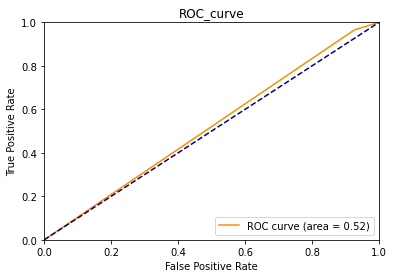

In [106]:
# Graficamente
fpr,tpr,threshold = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [107]:
# Codigo para calcular el indice de Kolmogorov-Smirnov (K-S)
from sklearn.metrics import roc_curve
import numpy as np

def ks(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)

    diff = np.subtract(tpr, fpr)

    mins, maxs = diff.min(), diff.max()

    return mins if abs(mins) > abs(maxs) else maxs

In [108]:
# Calculamos el indice K-S
ksind=ks(y_test,y_pred)

In [109]:
#Calculamos el indice GINI
gini=roc_Auc-1

In [110]:
print('ROC')
print(roc_Auc)
print('Indice K-S')
print(ksind)
print('Indice de GINI')
print(gini)

ROC
0.5194374368208704
Indice K-S
0.038874873641740804
Indice de GINI
-0.4805625631791296


## EJERCICIO 2
# ÁRBOL DE CLASIFICACION

In [111]:
# Utilizamos x e y los conjunbtos de datos separados en el ejercicio 
# anterior.
x

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,Tiempo_aparicion
12967,-0.245281,0.106659,0.004452,0.001128,-0.126948,0.026039,0.004452,0.082955,0.075777,0.234278,0.024983,0.116727,0.145288,-0.077855
12357,-0.245281,0.106659,0.060068,0.013677,0.113835,-0.062767,0.060068,0.082955,-0.008862,0.234278,0.024983,0.195277,0.077305,-0.227190
1745,-0.245281,0.093232,0.060068,-0.055786,0.113835,0.026039,0.060068,0.082955,0.075777,0.084886,0.024983,0.195277,-0.067852,-0.067888
4180,-0.245281,-0.019674,0.060068,0.012208,0.113835,-0.110645,0.060068,0.016797,0.034746,0.437094,0.024983,-0.176412,0.077305,-0.067888
5917,-0.245281,0.106659,0.060068,-0.013528,0.074187,0.026039,0.060068,0.082955,0.075777,-0.181901,0.024983,0.195277,0.055292,-0.067888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,1.038796,-0.019674,0.060270,-0.000471,0.074187,0.026039,0.060270,0.082955,0.075777,0.437094,0.024983,-0.055213,0.127082,0.156608
5245,1.038796,-0.019674,0.036606,-0.000471,-0.126948,-0.110645,0.036606,0.051698,0.145288,0.167724,0.024983,0.118435,0.004931,1.155531
1711,1.038796,-0.019674,0.060270,0.021428,-0.126948,0.026039,0.060270,0.082955,0.075777,0.095194,0.024983,0.037584,0.127082,1.155531
6241,1.038796,-0.019674,0.060270,0.012208,-0.126948,0.026039,0.060270,0.097474,0.187959,0.437094,0.024983,-0.125536,0.055292,1.155531


In [112]:
# recordemos que y es nuestra variable dependiente o 'target'
y

12967    0
12357    1
1745     0
4180     1
5917     1
        ..
4742     1
5245     1
1711     1
6241     1
4211     1
Name: credito, Length: 17248, dtype: int32

In [113]:
# separamos datos de test y entrenamiento
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.2)

In [114]:
# definimos el algoritmo a utilizar
# primero importamos la paqueteria del arbol
from sklearn.tree import DecisionTreeClassifier
algoritmo2=DecisionTreeClassifier(criterion='entropy')

In [115]:
# entrenamos el modelo
algoritmo2.fit(x_train2,y_train2)

DecisionTreeClassifier(criterion='entropy')

In [116]:
# testeamos el algoritmo, ie, calculamos las predicciones para el test
y_pred2=algoritmo2.predict(x_test2)

In [117]:
#verificamos la matriz de confusion
matriz=confusion_matrix(y_test2,y_pred2)

In [118]:
print('Matriz de confusion')
matriz

Matriz de confusion


array([[ 480,  744],
       [ 801, 1425]], dtype=int64)

In [119]:
# calculemos la precision del modelo
precision=precision_score(y_test2,y_pred2)
print('Precision del modelo')
precision

Precision del modelo


0.656984785615491

### Sin embargo, buscamos ajustar los hiperparametros para buscar mejorar nuestro modelo, por lo que procedemos como sigue:

In [120]:
param_dict={'criterion':['gini','entropy'],
           'max_depth':range(1,10),
           'min_samples_split':range(1,10),
           'min_samples_leaf':range(1,5)}

In [121]:
# encontremos los hiperparametros utilizando gridsearchcv
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
grid=GridSearchCV(algoritmo2,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


C:\Users\alexe\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886
 0.63001886 0.63001886 0.63001886        nan 0.63001886 0.63001886
 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886
        nan 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886
 0.63001886 0.63001886 0.63001886        nan 0.63001886 0.63001886
 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886
        nan 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886
 0.63001886 0.63001886 0.63001886        nan 0.63001886 0.63001886
 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886
        nan 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886
 0.63001886 0.63001886 0.63001886        nan 0.63001886 0.63001886
 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886 0.63001886
        nan 0.62784295 0.62784295 0.62784295 0.627842

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [122]:
# encontremos el mejor hiperparametro
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [123]:
# Podemos encontrar los mejores valores para los parámetros 
# utilizando el mejor estimador de atributos.
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [124]:
# Calculamos la precision del modelo con hiperparametros ajustados
grid.best_score_

0.6313226345492954

In [125]:
# Finalmente calculamos los indices K-S, AUC Y GINI

In [126]:
# calculemos la curva ROC - AUC del modelo
roc_Auc=roc_auc_score(y_test2,y_pred2)
roc_Auc

0.5161592939062418

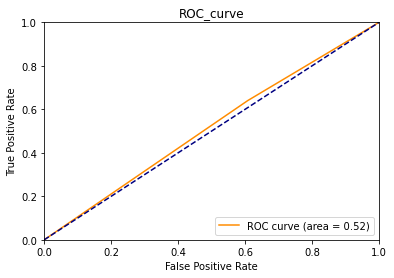

In [127]:
# Graficamente
fpr,tpr,threshold = roc_curve(y_test2,y_pred2)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [128]:
# Calculamos el indice K-S
ksind=ks(y_test2,y_pred2)
#Calculamos el indice GINI
gini=roc_Auc-1

In [129]:
print('ROC')
print(roc_Auc)
print('Indice K-S')
print(ksind)
print('Indice de GINI')
print(gini)

ROC
0.5161592939062418
Indice K-S
0.032318587812483535
Indice de GINI
-0.4838407060937582


## 3.- Seleccionar con validación cruzada cuál es el mejor modelo de los dos problemas anteriores. 
### Validación cruzada 

In [130]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [131]:
# Creación del conjunto de datos de validación.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [132]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
shuffle=True

In [133]:
from sklearn.model_selection import KFold
# Agregamos los modelos a contrastar en un objeto llamado models
models = []
# primero el algoritmo de regresion logistica
models.append(('LR', LogisticRegression()))
#luego el algoritmo del arbol de clasificacion
models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.639296 (0.013130)
CART: 0.547324 (0.013355)


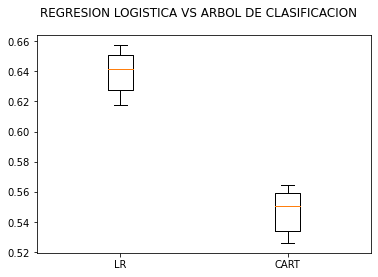

In [134]:
# Comparamos los modelos graficamente
fig = plt.figure()
fig.suptitle('REGRESION LOGISTICA VS ARBOL DE CLASIFICACION')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Asi, observamos graficamente que el modelo que nos ofrece una mejor precision es el modelo basado en la Regresion logistica, por lo que seleccionamos este modelo para nuestro conjunto de datos.

## 4.- Obtener los puntos óptimos de decisión para el modelo seleccionado.

In [143]:
#Hacemos preicciones con el modelo seleccionado
RL = LogisticRegression()
RL.fit(x_train, y_train)
y_pred = RL.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6376811594202898
[[  83 1176]
 [  74 2117]]
              precision    recall  f1-score   support

           0       0.53      0.07      0.12      1259
           1       0.64      0.97      0.77      2191

    accuracy                           0.64      3450
   macro avg       0.59      0.52      0.44      3450
weighted avg       0.60      0.64      0.53      3450



Area under the ROC curve : 0.516075


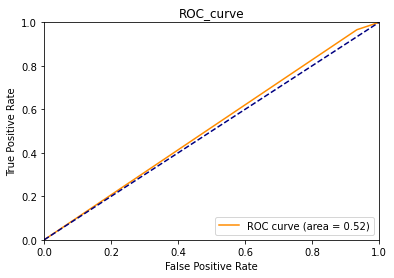

In [144]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
roc_Auc=roc_auc_score(y_test,y_pred)
fpr,tpr,threshold = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
print("Area under the ROC curve : %f" % roc_auc)
# Graficamente
fpr,tpr,threshold = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

[1]


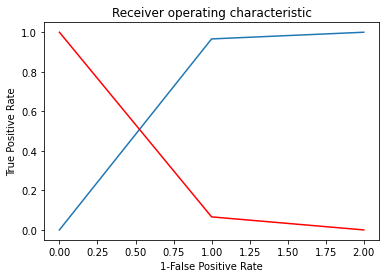

In [145]:
# aquel punto tal que tpr - (1-fpr) 0 o cercano a 0 es el punto de corte optimo para el modelo
####################################
i = np.arange(len(tpr)) # index 
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')

# fucnion para encontrar el punto opyimo
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

threshold = Find_Optimal_Cutoff(y_test,y_pred)
print(threshold)

In [ ]:
# Finalmente, el punto de corte optimo para nuestro modelo de regression logistica es 1.